#  Scale-Invariant Feature Transform (SIFT) 

The scale-invariant feature transform (SIFT) is a computer vision algorithm to detect, describe, and match local features in images. Applications include object recognition, robotic mapping and navigation, etc.

SIFT keypoints of objects are first extracted from a set of reference images and stored in a database. An object is recognized in a new image by individually comparing each feature from the new image to this database and finding candidate matching features based on Euclidean distance of their feature vectors. From the full set of matches, subsets of keypoints that agree on the object and its location, scale, and orientation in the new image are identified to filter out good matches. The determination of consistent clusters is performed rapidly by using an efficient hash table implementation of the generalised Hough transform. Each cluster of 3 or more features that agree on an object and its pose is then subject to further detailed model verification and subsequently outliers are discarded. Finally the probability that a particular set of features indicates the presence of an object is computed, given the accuracy of fit and number of probable false matches. Object matches that pass all these tests can be identified as correct with high confidence.
_source: https://en.wikipedia.org/wiki/Scale-invariant_feature_transform_

This algorithm is invariant to 
1. Scale (becasue we use intensity gradient)
2. Rotation 
3. Translation (background)
4.  (becasue we use intensity gradient)

and partially invariant to 
1. Illumination changes such as image brightness and contrast (because we use normalize feature vectors)
2. Camera viewpoint
3. Occlusion (when the object is party blocked by something else) and cluter

## Using SIFT Library in OpenCV

### Preparation
Make sure you have OpenCV and its contrib module installed using the following commands:

`pip install opencv-python`

`pip install opencv-contrib-python`


### Import Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt

### Read and Load an Image using CV2

In [3]:
# LOAD AN IMAGE USING 'IMREAD'
img = cv2.imread("4_SIFT&RANSAC/all_souls_000002.jpg")
# DISPLAY
cv2.imshow("All Souls", img)
cv2.waitKey(0)

-1

### Visualize the key points 

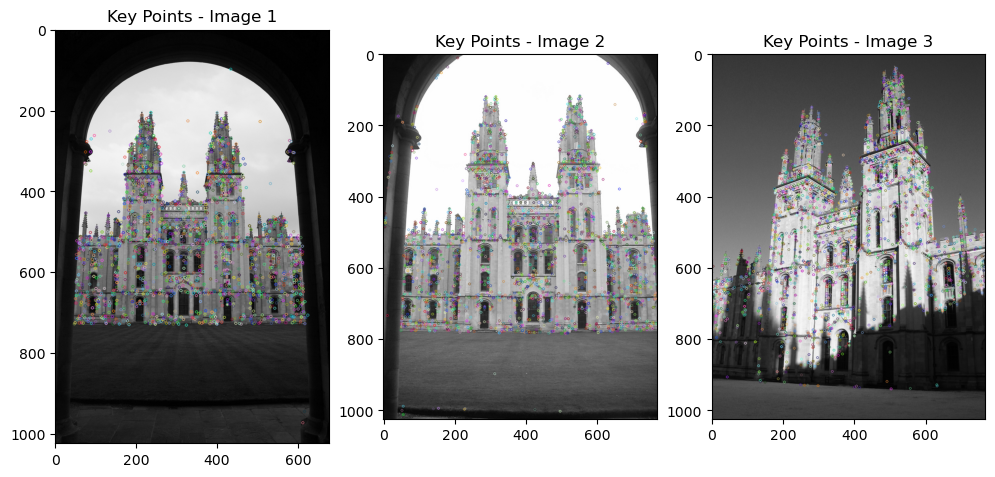

In [9]:
# Load images
img1 = cv2.imread("4_SIFT&RANSAC/all_souls_000002.jpg", 0) # 0 means read as Grayscale
img2 = cv2.imread("4_SIFT&RANSAC/all_souls_000006.jpg", 0)
img3 = cv2.imread("4_SIFT&RANSAC/all_souls_000013.jpg", 0) 

# cv2.imshow("All Souls", img1)
# cv2.waitKey(0)

# Create Sift
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None) #None : No mask to specify a region of interest (ROI) where key points should be detected.
kp2, des2 = sift.detectAndCompute(img2, None)
kp3, des3 = sift.detectAndCompute(img3, None)

# Visualize key points
img1_keypoints = cv2.drawKeypoints(img1, kp1, None) # None: create a new image, draw keypoints on this new image, not on the original img.
img2_keypoints = cv2.drawKeypoints(img2, kp2, None)
img3_keypoints = cv2.drawKeypoints(img3, kp3, None)

plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(img1_keypoints, cmap='gray'), plt.title('Key Points - Image 1')
plt.subplot(132), plt.imshow(img2_keypoints, cmap='gray'), plt.title('Key Points - Image 2')
plt.subplot(133), plt.imshow(img3_keypoints, cmap='gray'), plt.title('Key Points - Image 3')
plt.show()

### Match the images